

The main goal of this milestone is to use Neural Networks to find out what are the optimal weights that can be used to aggregate different features scores to indicate the importance of sentences in the dataset assigned to your group.

The final outcome of this project is to create a Neural Network model with appropriate loss and metric functions that will produce the optimal weights for aggregating various NLP feature scores.

<center>
  <font size="8">Text Summarization</font><br>
  <font size="4"> Teaching Assistant CS-256</font><br>
  Pradyumna Raparti</center>


The final outcome of this project is to create a Neural Network model with appropriate loss and metric functions that will produce the optimal weights for aggregating various NLP feature scores.
 

## We are working on the <font color= red>business dataset </font>

## Main tasks


## Project Result Outline
- [How many txt files](#how_many_data)

- [Tokenize with TFIDF](#tokenize)
- [Show stop words](#stopwords)

- [Features](#features)
	- [Title](#title)
	- [Sentence Length](#sentencelength)
	- [Sentence position ](#position)
  - [Term Weight](#termweight)
	- [Proper Noun](#propernoun)
	- [Numerical Data ](#numerical)
                                     
- [Combining features](#combine)

- [Validation](#validation)
- [Experimenting with stopwords, lemmatization, and stemming](#experiment)

- [Making sure sentences are properly separated](#separation)  
- [Extract sentences from the news articles and summaries ](#extraction) 
- [Tokenize extracted sentences ](#tokenize_extraction)
  - [Neural Netwrokds with customized metric function ](#keras)
  - [Training Neural Netwrokds ](#training)
  - [Weights profile ](#weight_plots)
  - [Conclusive weights](#weight_plots)
- [GridSearch Hyperparameters](#grid)

---
- [B1: TextRank](#textrank)
	
- [B2: TFHub](#tfhub)
	
- [B4: ROUGE](#rouge)



**Load packages:**

## Get a copy of the data to your own Google drive
Step 1. Use [this chrome app](https://script.google.com/macros/s/AKfycbxbGNGajrxv-HbX2sVY2OTu7yj9VvxlOMOeQblZFuq7rYm7uyo/exec) to copy the[ BBC News Summary](https://drive.google.com/drive/folders/1ZryN8xuRFi0LNYPS1zfZ43RsuW0L6lij?usp=share_link) folder that I shared with you to your own drive.  
Step 2. Put the copied folder in the exact path under your Google drive, i.e., ``` /content/drive/MyDrive/sharedata/BBC News Summary ```.



In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1 Mount the Google drive in preparation for data access
!pip install -U path.py
import numpy as np
import pandas as pd
import os
from path import Path
# from google.colab import drive
# drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id='load_data'></a>

### Load the data

---

Import the assinged data into a pandas DataFrame.
(Extend the code below to access other files under your assigned folder)

In [ ]:
corpus = []
corpus_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/business')

for file_path in corpus_dir.files('*.txt'):
    with file_path.open(mode='rt', encoding='utf-8') as fp:
        lines = fp.read().splitlines()
        corpus.append([i for i in lines if i])

### Show what the first txt file looks like

In [ ]:
corpus[0]

["India's rupee hits five-year high",
 "India's rupee has hit a five-year high after Standard & Poor's (S&P) raised the country's foreign currency rating.",
 "The rupee climbed to 43.305 per US dollar on Thursday, up from a close of 43.41. The currency has gained almost 1% in the past three sessions. S&P, which rates borrowers' creditworthiness, lifted India's rating by one notch to 'BB+'. With Indian assets now seen as less of a gamble, more cash is expected to flow into its markets, buoying the rupee.",
 '"The upgrade is positive and basically people will use it as an excuse to come back to India," said Bhanu Baweja, a strategist at UBS. "Money has moved out from India in the first two or three weeks of January into other markets like Korea and Thailand and this upgrade should lead to a reversal." India\'s foreign currency rating is now one notch below investment grade, which starts at \'BBB-\'. The increase has put it on the same level as Romania, Egypt and El Salvador, and one leve

<a name='how_many_data'></a>
### How many txt files are under your assigned folder?

In [ ]:
print('There are {} text files under my assigned folder'.format(len(corpus)))

There are 510 text files under my assigned folder


<a name='tokenize'></a>

### Tokenize all sentences in the give survey dataset with TFIDF.

- Start with default parameters.
- How many rows and columns are there in the resultant vectorized dataframe.


In [ ]:
X = [item for sublist in corpus for item in sublist]
tvec = TfidfVectorizer(ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, stop_words = 'english') #removing stop words
tvec_dictionary = tvec.fit(X)
X_tvec = tvec.transform(X)
print("Vocabulary size: {}".format(len(tvec_dictionary.vocabulary_))) #all the unique words corpus. AKA tokens or features. 11,883 features
print("Vocabulary content:\n {}".format(tvec_dictionary.vocabulary_)) #encoded words in the training data
print("encoded corpus documents : \n{}".format(X_tvec.toarray()))
print("encoded corpus shape : \n{}".format(X_tvec.shape)) #2688 documents each with 11,883 features

Vocabulary size: 11617
Vocabulary content:
 {'india': 5648, 'rupee': 9163, 'hits': 5374, 'year': 11568, 'high': 5333, 'hit': 5370, 'standard': 9960, 'poor': 8020, 'raised': 8475, 'country': 3106, 'foreign': 4715, 'currency': 3218, 'rating': 8509, 'climbed': 2649, '43': 516, '305': 395, 'dollar': 3767, 'thursday': 10575, 'close': 2658, '41': 495, 'gained': 4873, 'past': 7715, 'sessions': 9448, 'rates': 8506, 'borrowers': 2014, 'creditworthiness': 3155, 'lifted': 6402, 'notch': 7285, 'bb': 1766, 'indian': 5649, 'assets': 1497, 'seen': 9385, 'gamble': 4880, 'cash': 2360, 'expected': 4323, 'flow': 4669, 'markets': 6700, 'buoying': 2193, 'upgrade': 11040, 'positive': 8048, 'basically': 1747, 'people': 7791, 'use': 11073, 'excuse': 4286, 'come': 2739, 'said': 9197, 'bhanu': 1862, 'baweja': 1762, 'strategist': 10095, 'ubs': 10865, 'money': 7007, 'moved': 7068, 'weeks': 11358, 'january': 5946, 'like': 6411, 'korea': 6164, 'thailand': 10523, 'lead': 6286, 'reversal': 8977, 'investment': 5846, '

In [ ]:
for i in range(5):
  print(corpus[i])
  print('-------\n')

["India's rupee hits five-year high", "India's rupee has hit a five-year high after Standard & Poor's (S&P) raised the country's foreign currency rating.", "The rupee climbed to 43.305 per US dollar on Thursday, up from a close of 43.41. The currency has gained almost 1% in the past three sessions. S&P, which rates borrowers' creditworthiness, lifted India's rating by one notch to 'BB+'. With Indian assets now seen as less of a gamble, more cash is expected to flow into its markets, buoying the rupee.", '"The upgrade is positive and basically people will use it as an excuse to come back to India," said Bhanu Baweja, a strategist at UBS. "Money has moved out from India in the first two or three weeks of January into other markets like Korea and Thailand and this upgrade should lead to a reversal." India\'s foreign currency rating is now one notch below investment grade, which starts at \'BBB-\'. The increase has put it on the same level as Romania, Egypt and El Salvador, and one level b

<a name='stopwords'></a>

###Show the top words

- Visualize them with a bar chart with frequency in y axis and words in the x-axis
- You may selectively choose top words as the stop words for your processing needs

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


([<matplotlib.axis.YTick at 0x7f7fbfcb0790>,
 [Text(0, 0, 'said'),
  Text(0, 0, 'year'),
  Text(0, 0, 'mr'),
  Text(0, 0, 'economy'),
  Text(0, 0, 'growth'),
  Text(0, 0, 'firm'),
  Text(0, 0, 'market'),
  Text(0, 0, 'bank'),
  Text(0, 0, 'new'),
  Text(0, 0, 'sales'),
  Text(0, 0, 'oil'),
  Text(0, 0, 'company'),
  Text(0, 0, '2004'),
  Text(0, 0, 'shares'),
  Text(0, 0, 'economic'),
  Text(0, 0, 'government'),
  Text(0, 0, 'uk'),
  Text(0, 0, 'prices'),
  Text(0, 0, 'yukos'),
  Text(0, 0, 'china'),
  Text(0, 0, 'deal'),
  Text(0, 0, 'world'),
  Text(0, 0, '000'),
  Text(0, 0, 'dollar'),
  Text(0, 0, 'rise'),
  Text(0, 0, 'profits'),
  Text(0, 0, 'india'),
  Text(0, 0, 'firms'),
  Text(0, 0, 'chief'),
  Text(0, 0, 'years')])

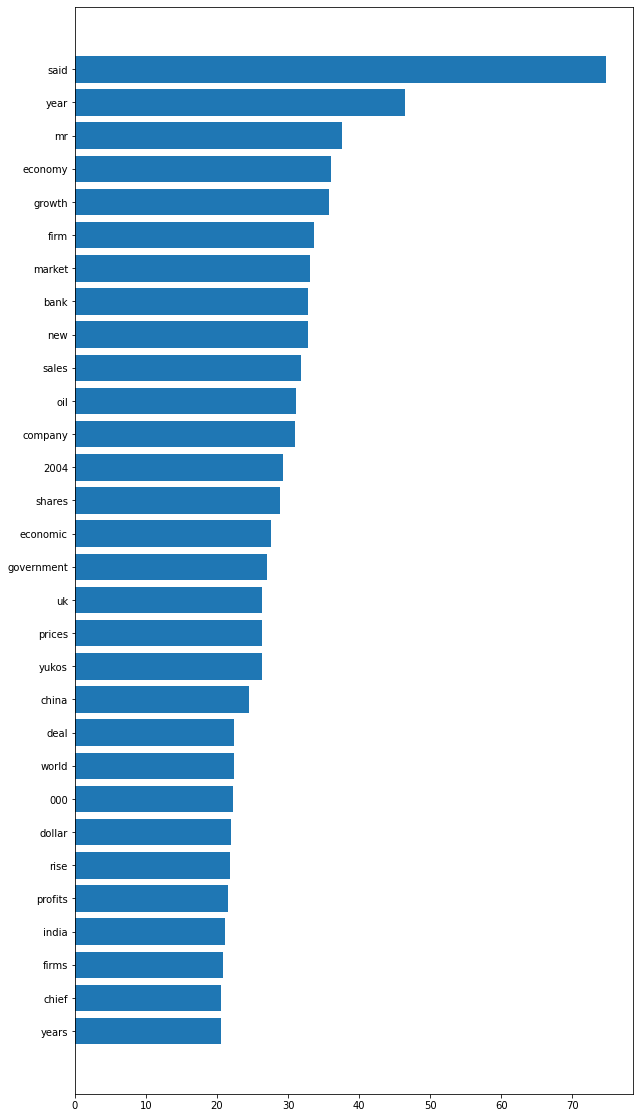

In [ ]:
from matplotlib import pyplot as plt
features_rank = list(zip(tvec.get_feature_names(), [x[0] for x in X_tvec.sum(axis=0).T.tolist()]))
# sorting
features_rank = np.array(sorted(features_rank, key=lambda x:x[1], reverse=True))
#top 30 words. we can change n to see the list of top words to select stopwords
n = 30
plt.figure(figsize=(10, 20))
plt.barh(-np.arange(n), features_rank[:n, 1].astype(float), height=.8)
plt.yticks(ticks=-np.arange(n), labels=features_rank[:n, 0])

### After preprocessing the text, it is necessary to extract features and calculate the functions of the sentence, the results of which are vectors of several elements for each sentence. The elements of each vector take values in the interval [0, 1]. We consider the following features

<a name='title'></a>

### Title feature (F1)
It is defined as a ratio of the number of matches of the Title words (Tw) in the current sentence (S) to the number of words (w) of the Title (T)   

<img alt="F1" src="https://drive.google.com/uc?export=view&id=1J1GGrkuGcHhPlGRIo7xmPlwHLe0I2LcV">

In [ ]:
def calculate_f1(sentence, title):
  sentence = sentence.lower()
  title = title.lower()
  sentence_list = sentence.split(" ")
  title_list = title.split(" ")

  return round(len(list(set(sentence_list)&set(title_list)))/len(title_list), 3)

<a name='sentencelength'></a>

###Sentence Length (F2)
It is defined as a ratio of the number of words (w) in the current sentence (S) to the number of words in the longest sentence (LS) in the text.   

<img alt="F2" src="https://drive.google.com/uc?export=view&id=1b42IWpr5svaCyQl6fdnGNWaLP3Rv4bgK">

In [ ]:
def calculate_f2(news,target_sentence):
  curr_max = 1
  for para in news:
    sentences = para.split(". ")
    for sent in sentences:
      n = len(sent.split(" "))
      if n > curr_max:
        curr_max = n

  target_sentence_length = len(target_sentence.split(" "))
  return round(float(target_sentence_length/curr_max), 3)

for i in corpus[0]:
  print(calculate_f2(corpus[0],i))

0.111
0.4
1.378
2.0


<a name='position'></a>

###Sentence position (F3)
It is defined as a maximum of the next two relations   

<img alt="F3" src="https://drive.google.com/uc?export=view&id=1WNqhFyRSkFR7RaGqtZaywOmQVBrUJyb0">


In [ ]:
def calculate_f3(article, sentenceIdx, total_sentences):
  return round(max(1/(sentenceIdx+1), 1/(total_sentences-sentenceIdx)), 3)

<a name='termweight'></a>

###Term Weight (F5)
It is defined as a ratio of the sum of the frequencies of term occurrences (TO) in a sentence (S) to the sum of the frequency of term occurrences in the text.   

<img alt="F5" src="https://drive.google.com/uc?export=view&id=1wS8NV1otHFjgu4NePxkyPwQXFpZ4f93q">


In [ ]:
def calculate_f5(article, sentence):
    dic={}
    for word in sentence.split():
      if word in dic:
          dic[word] = dic[word] + 1
      else:
          dic[word]=1

    articleDic = {}
    for para in article:
      for lin in para.split(". "):
        for w in lin.split():
          if w in dic:
            if w in articleDic:
              articleDic[w] = articleDic[w] + 1
            else:
              articleDic[w]=1
    return round(sum(dic.values())/sum(articleDic.values()), 3) if sum(articleDic.values()) != 0 else 0 

<a name='propernoun'></a>

###Proper Noun (F6):     
It is defined as a ratio of the number of proper nouns (PN) in a sentence (S) to the length (L) of a sentence

<img alt="F6" src="https://drive.google.com/uc?export=view&id=1MEBknA87K-vPSlu061F-hOz_c9aHrl6W">

In [ ]:
import nltk
from nltk import pos_tag
from nltk import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
def calculate_f6(sentence):
  ls = []
  words = word_tokenize(sentence)
  tagged = pos_tag(words)
  for word,tag in tagged:
    if tag == 'NNP' or tag == 'NNPS':
      ls.append(word)

  return round(float(len(ls))/len(sentence), 3)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a name='numerical'></a>

###Numerical Data (F7)
 It is defined as a ratio of the number of numerical data (ND) in the sentence (S) to the length (L) of the sentence   

 <img alt="F7" src="https://drive.google.com/uc?export=view&id=1tCaSaipvqs3CvpvISyCR5ytNzDCuwJV5">


In [ ]:
def calculate_f7(sentence):
  n = len(sentence)
  numericWordCount = 0
  words = word_tokenize(sentence)
  tagged = pos_tag(words)
  for word,tag in tagged:
    if tag == 'CD':
      numericWordCount += 1
  return round(float(numericWordCount)/n, 3)

<a name='combine'></a>

###Combining feature vectors to decide which are representative statements
   


In [ ]:
Y = [article[0] for article in corpus]
X = [article[1:] for article in corpus]

X_features = [[] for i in range(len(X))]
for i in range(len(X)):
  articleTitle = Y[i]
  articleContent = X[i]
  X_features[i] = []
  for j in range(len(articleContent)):
    para = articleContent[j]
    lines = []
    lines_in_para = para.split(". ")
    for line in lines_in_para:
      if line != '':
        lines.append(line)
    for n in range(len(lines)):
      X_features[i].append([])
      X_features[i][len(X_features[i])-1].append(calculate_f1(lines[n], articleTitle))
      X_features[i][len(X_features[i])-1].append(calculate_f2(articleContent, lines[n]))
      X_features[i][len(X_features[i])-1].append(calculate_f3(corpus[i], n, len(lines)))
      X_features[i][len(X_features[i])-1].append(calculate_f5(corpus[i], lines[n]))
      X_features[i][len(X_features[i])-1].append(calculate_f6(lines[n]))
      X_features[i][len(X_features[i])-1].append(calculate_f7(lines[n]))
  # if i == 5: break

In [ ]:
def calculate_fscore(features):
  W = np.array([6, 0.5, 1, 3, 5, 2])
  x = np.array(features)
  return W@x/W.sum()

sentences = [[] for i in range(len(X))] 
for i in range(len(X)):
  for j in range(len(X[i])):
    sentences[i].extend(X[i][j].split(". "))
print(sentences)
for l in range(len(X_features)):
  print('Article Title : {}'.format(Y[l]))  
  for m in range(len(X_features[l])):
    print('sentence : {}'.format(sentences[l][m]))
    print('sentence features : {}'.format(X_features[l][m]))
    fScore = round(calculate_fscore(X_features[l][m]), 3)
    print('score : {}'.format(fScore))

Streaming output truncated to the last 5000 lines.
sentence features : [0.0, 0.957, 1.0, 0.449, 0.016, 0.0]
score : 0.166
Article Title : Giant waves damage S Asia economy
sentence : Governments, aid agencies, insurers and travel firms are among those counting the cost of the massive earthquake and waves that hammered southern Asia.
sentence features : [0.167, 0.523, 1.0, 0.13, 0.007, 0.0]
score : 0.154
sentence : The worst-hit areas are Sri Lanka, India, Indonesia and Thailand, with at least 23,000 people killed
sentence features : [0.0, 0.364, 1.0, 0.242, 0.05, 0.01]
score : 0.124
sentence : Early estimates from the World Bank put the amount of aid needed at about $5bn (£2.6bn), similar to the cash offered Central America after Hurricane Mitch
sentence features : [0.0, 0.591, 0.5, 0.152, 0.039, 0.006]
score : 0.083
sentence : Mitch killed about 10,000 people and caused damage of about $10bn in 1998
sentence features : [0.167, 0.295, 0.5, 0.144, 0.014, 0.041]
score : 0.128
sentence : 

<a name='validation'></a>

###Validation



In [ ]:
from nltk.util import parallelize_preprocess
def getArticle(article_no):
  article_no = article_no.zfill(3)[-3:]
  path = '/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/business/' + article_no + '.txt'

  paragraphs = []
  article_path = Path(path)

  with article_path.open(mode='rt', encoding='utf-8') as fp:
    lines = fp.read().splitlines()
    for i in lines:
      if len(i) > 0:
        paragraphs.append(i)

  return paragraphs
def getSummary(paragraphs):
  Y = paragraphs[0]
  X = [paragraphs[1:]]
  print(X)
  W = np.array([6, 0.5, 1, 3, 5, 2])
  max_weighted_score = -1
  summary = ""
  for i in range(len(X)):
    articleTitle = Y
    articleContent = X[i]
    lines = []
    for j in range(len(articleContent)):
      para = articleContent[j]
      lines_in_para = para.split(". ")
      for line in lines_in_para:
        if line != '':
          lines.append(line)
    scores = []*(len(lines))
    for n in range(len(lines)):
      scores.append([])
      scores[n].append(calculate_f1(lines[n], articleTitle))
      scores[n].append(calculate_f2(articleContent, lines[n]))
      scores[n].append(calculate_f3(paragraphs, n, len(lines)))
      scores[n].append(calculate_f5(paragraphs, lines[n]))
      scores[n].append(calculate_f6(lines[n]))
      scores[n].append(calculate_f7(lines[n]))

      weighted_score = W@scores[n]/W.sum()
      if weighted_score > max_weighted_score:
        max_weighted_score = weighted_score
        summary = lines[n]

  return (summary,max_weighted_score)

article_no = input("Enter the article for which you want the summary: ")

paragraphs = getArticle(article_no)
print("Title: ", paragraphs[0])
summary,max_weighted_score = getSummary(paragraphs)
print("Summary: ", summary)
print("Score: ", max_weighted_score)

In [ ]:
drive.flush_and_unmount()

<a name='experiment'></a>
###Experiment with removing stopwords, lemmatization, and stemming options in vectorizing the given dataset.


In [ ]:
#Function for removing stop words from corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
def removeStopWords(corpus):
  corpusNew = []
  
  stop_words = set(stopwords.words('english'))
  for article in corpus:
    articleList = []
    for sentence in article:
      word_tokens = word_tokenize(sentence)
        
      filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
      sent = " ".join(filtered_sentence)
      articleList.append(sent)

    corpusNew.append(articleList)
  return corpusNew
        
corpusWithoutStopwords = removeStopWords(corpus)
print(corpus[0])
print(corpusWithoutStopwords[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Fed warns of more US rate rises', 'The US looks set for a continued boost to interest rates in 2005, according to the Federal Reserve.', 'Minutes of the December meeting which pushed rates up to 2.25% showed that policy-makers at the Fed are worried about accelerating inflation. The clear signal pushed the dollar up to $1.3270 to the euro by 0400 GMT on Wednesday, but depressed US shares. "The markets are starting to fear a more aggressive Fed in 2005," said Richard Yamarone of Argus Research. The Dow Jones index dropped almost 100 points on Tuesday, with the Nasdaq also falling as key tech stocks were hit by broker downgrades. The dollar also gained ground against sterling on Tuesday, reaching $1.8832 to the pound before slipping slightly on Wednesday morning.', 'The release of the minutes just three weeks after the 14 December meeting was much faster than usual, indicating the Fed wants to keep markets more apprised of its thinking. This, too, is being taken in some quarters as a s

In [ ]:
#Function for performing lemmetization corpus
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('omw-1.4')
def applyLemmetization(corpus):
  lemmatizer = WordNetLemmatizer()
  corpusNew = []
  
  for article in corpus:
    articleList = []
    for sentence in article:
      word_tokens = word_tokenize(sentence)
        
      lemmetized_sentence = []
      for word in word_tokens:
        lemmetized_sentence.append(lemmatizer.lemmatize(word))
      sent = " ".join(lemmetized_sentence)
      articleList.append(sent)

    corpusNew.append(articleList)
  return corpusNew
        
corpusWithLemmetization = applyLemmetization(corpus)
print(corpus[0])
print(corpusWithLemmetization[0])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['Fed warns of more US rate rises', 'The US looks set for a continued boost to interest rates in 2005, according to the Federal Reserve.', 'Minutes of the December meeting which pushed rates up to 2.25% showed that policy-makers at the Fed are worried about accelerating inflation. The clear signal pushed the dollar up to $1.3270 to the euro by 0400 GMT on Wednesday, but depressed US shares. "The markets are starting to fear a more aggressive Fed in 2005," said Richard Yamarone of Argus Research. The Dow Jones index dropped almost 100 points on Tuesday, with the Nasdaq also falling as key tech stocks were hit by broker downgrades. The dollar also gained ground against sterling on Tuesday, reaching $1.8832 to the pound before slipping slightly on Wednesday morning.', 'The release of the minutes just three weeks after the 14 December meeting was much faster than usual, indicating the Fed wants to keep markets more apprised of its thinking. This, too, is being taken in some quarters as a s

In [ ]:
#Function for performing stemming corpus
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


def applyStemming(corpus):
  corpusNew = []
  ps = PorterStemmer()

  for article in corpus:
    articleList = []
    for sentence in article:
      word_tokens = word_tokenize(sentence)
        
      stemmed_sentence = []
      for word in word_tokens:
        stemmed_sentence.append(ps.stem(word))
      sent = " ".join(stemmed_sentence)
      articleList.append(sent)

    corpusNew.append(articleList)
  return corpusNew

corpusWithStemming = applyStemming(corpus)
print(corpus[0])
print(corpusWithStemming[0])

['Fed warns of more US rate rises', 'The US looks set for a continued boost to interest rates in 2005, according to the Federal Reserve.', 'Minutes of the December meeting which pushed rates up to 2.25% showed that policy-makers at the Fed are worried about accelerating inflation. The clear signal pushed the dollar up to $1.3270 to the euro by 0400 GMT on Wednesday, but depressed US shares. "The markets are starting to fear a more aggressive Fed in 2005," said Richard Yamarone of Argus Research. The Dow Jones index dropped almost 100 points on Tuesday, with the Nasdaq also falling as key tech stocks were hit by broker downgrades. The dollar also gained ground against sterling on Tuesday, reaching $1.8832 to the pound before slipping slightly on Wednesday morning.', 'The release of the minutes just three weeks after the 14 December meeting was much faster than usual, indicating the Fed wants to keep markets more apprised of its thinking. This, too, is being taken in some quarters as a s

In [ ]:
corpusWithoutStopwords = removeStopWords(corpus)

for articles in corpusWithoutStopwords:
  print("Title: ", articles[0])
  summary,max_weighted_score = getSummary(articles)
  print("Summary: ", summary)
  print("Score: ", max_weighted_score)

Title:  Fed warns US rate rises
[['US looks set continued boost interest rates 2005 , according Federal Reserve .', "Minutes December meeting pushed rates 2.25 % showed policy-makers Fed worried accelerating inflation . clear signal pushed dollar $ 1.3270 euro 0400 GMT Wednesday , depressed US shares . `` markets starting fear aggressive Fed 2005 , '' said Richard Yamarone Argus Research . Dow Jones index dropped almost 100 points Tuesday , Nasdaq also falling key tech stocks hit broker downgrades . dollar also gained ground sterling Tuesday , reaching $ 1.8832 pound slipping slightly Wednesday morning .", "release minutes three weeks 14 December meeting much faster usual , indicating Fed wants keep markets apprised thinking . , , taken quarters sign aggressive moves interest rates come . key Fed funds rate risen 1.25 percentage points 2004 46-year low 1 % reached long 9/11 attacks 2001 . long trough `` might contributing signs potentially excessive risk-taking financial markets '' , s

In [ ]:
corpusWithStemming = applyStemming(corpus)

for articles in corpusWithStemming:
  print("Title: ", articles[0])
  # for i in articles[1:]:
  #   print(i)
  summary,max_weighted_score = getSummary(articles)
  print("Summary: ", summary)
  print("Score: ", max_weighted_score)

Title:  fed warn of more us rate rise
[['the us look set for a continu boost to interest rate in 2005 , accord to the feder reserv .', "minut of the decemb meet which push rate up to 2.25 % show that policy-mak at the fed are worri about acceler inflat . the clear signal push the dollar up to $ 1.3270 to the euro by 0400 gmt on wednesday , but depress us share . `` the market are start to fear a more aggress fed in 2005 , '' said richard yamaron of argu research . the dow jone index drop almost 100 point on tuesday , with the nasdaq also fall as key tech stock were hit by broker downgrad . the dollar also gain ground against sterl on tuesday , reach $ 1.8832 to the pound befor slip slightli on wednesday morn .", "the releas of the minut just three week after the 14 decemb meet wa much faster than usual , indic the fed want to keep market more appris of it think . thi , too , is be taken in some quarter as a sign of aggress move on interest rate to come . the key fed fund rate ha risen 

In [ ]:
corpusWithLemmetization = applyLemmetization(corpus)

for articles in corpusWithLemmetization:
  print("Title: ", articles[0])
  summary,max_weighted_score = getSummary(articles)
  print("Summary: ", summary)
  print("Score: ", max_weighted_score)

Title:  Fed warns of more US rate rise
[['The US look set for a continued boost to interest rate in 2005 , according to the Federal Reserve .', "Minutes of the December meeting which pushed rate up to 2.25 % showed that policy-makers at the Fed are worried about accelerating inflation . The clear signal pushed the dollar up to $ 1.3270 to the euro by 0400 GMT on Wednesday , but depressed US share . `` The market are starting to fear a more aggressive Fed in 2005 , '' said Richard Yamarone of Argus Research . The Dow Jones index dropped almost 100 point on Tuesday , with the Nasdaq also falling a key tech stock were hit by broker downgrade . The dollar also gained ground against sterling on Tuesday , reaching $ 1.8832 to the pound before slipping slightly on Wednesday morning .", "The release of the minute just three week after the 14 December meeting wa much faster than usual , indicating the Fed want to keep market more apprised of it thinking . This , too , is being taken in some qua

In [ ]:
# corpusWithoutStopwords = removeStopWords(corpus)
corpusWithLemmetizationAndNoStopWords = applyLemmetization(removeStopWords(corpus))

for articles in corpusWithLemmetizationAndNoStopWords:
  print("Title: ", articles[0])
  summary,max_weighted_score = getSummary(articles)
  print("Summary: ", summary)
  print("Score: ", max_weighted_score)

Title:  Fed warns US rate rise
[['US look set continued boost interest rate 2005 , according Federal Reserve .', 'Minutes December meeting pushed rate 2.25 % showed policy-makers Fed worried accelerating inflation . clear signal pushed dollar $ 1.3270 euro 0400 GMT Wednesday , depressed US share . `` market starting fear aggressive Fed 2005 , `` said Richard Yamarone Argus Research . Dow Jones index dropped almost 100 point Tuesday , Nasdaq also falling key tech stock hit broker downgrade . dollar also gained ground sterling Tuesday , reaching $ 1.8832 pound slipping slightly Wednesday morning .', "release minute three week 14 December meeting much faster usual , indicating Fed want keep market apprised thinking . , , taken quarter sign aggressive move interest rate come . key Fed fund rate risen 1.25 percentage point 2004 46-year low 1 % reached long 9/11 attack 2001 . long trough `` might contributing sign potentially excessive risk-taking financial market `` , said Federal Open Mark

<a id='load_data'></a>

### Load the data

---


In [ ]:
import nltk.data
!pip install -U path.py
import numpy as np
import pandas as pd
import os
from path import Path
nltk.download('punkt')
from google.colab import drive
drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Get all the articles in the domain

In [ ]:
documents = []
documents_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/business')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
for i in range(200):
  for file_path in documents_dir.files(f'{i:03d}'+'.txt'):
    with file_path.open(mode='rt', encoding='utf-8') as fp:
        lines = fp.read()
        documents.append(tokenizer.tokenize(lines))
documents



[['Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.',
  'The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales.',
  'TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.',
  'Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.',
  'Time Warner said on Friday that it now owns 8% of search-engine Google.',
  'But its own internet business, AOL, had has mixed fortunes.',
  'It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.',
  "However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.",
  "It hopes to increase subscribers by offering the online service free to TimeWarner int

### Get the summary 

In [ ]:
summaries = []
summaries_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/Summaries/business')
for i in range (200):
  for file_path in summaries_dir.files(f'{i:03d}'+'.txt'):
      with file_path.open(mode='rt', encoding='utf-8') as fp:
          lines = fp.read()
          summaries.append(tokenizer.tokenize(lines))
summaries

[["TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.Time Warner's fourth quarter profits were slightly better than analysts' expectations."],
 ["The dollar has hit its highest level against the euro in almost three months after the Fed

<a name='extraction'></a>
### extract sentences from the news articles and summaries

In [ ]:
sentences = []
summary = []
keys = []
for i in range(len(documents)):
  sentences += documents[i]
  summary += summaries[i]
  keys += documents[i][0].split()
print(len(sentences),len(summary))

2983 289


<a name='tokenize_extraction'></a>
### Tokenize extracted sentences

In [ ]:
!pip install word2number
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
count = CountVectorizer(stop_words='english')
import pandas as pd
df = pd.DataFrame(sentences)

bag_of_words = count.fit_transform(df.squeeze())# transform df to a series
counts = pd.DataFrame(bag_of_words.toarray(),
                  columns=count.get_feature_names_out())
counts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=6873bbe9ad7615073f8f750454f878b390ea4a0681ba2969fd2b45017acbe0c5
  Stored in directory: /root/.cache/pip/wheels/cb/f3/5a/d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


000  000bn  01  03  04  04bn  05  050  05bn  06  ...  yugansk  \
0       0      0   0   0   0     0   0    0     0   0  ...        0   
1       0      0   0   0   0     0   0    0     0   0  ...        0   
2       0      0   0   0   0     0   0    0     0   0  ...        0   
3       0      0   0   0   0     0   0    0     0   0  ...        0   
4       0      0   0   0   0     0   0    0     0   0  ...        0   
...   ...    ...  ..  ..  ..   ...  ..  ...   ...  ..  ...      ...   
2978    0      0   0   0   0     0   0    0     0   0  ...        0   
2979    0      0   0   0   0     0   0    0     0   0  ...        0   
2980    0      0   0   0   0     0   0    0     0   0  ...        0   
2981    0      0   0   0   0     0   0    0     0   0  ...        0   
2982    0      0   0   0   0     0   0    0     0   0  ...        0   

      yuganskneftegas  yuganskneftegaz  yukon  yukos  yulia  yushchenko  \
0                   0                0      0      0      0           0   
1                   0                0      0      0      0           0   
2                   0                0      0      0      0           0   
3                   0                0      0      0      0           0   
4                   0                0      0      0      0           0   
...               ...              ...    ...    ...    ...         ...   
2978                0                0      0      0      0           0   
2979                0                0      0      0      0           0   
2980                0                0      0      0      0           0   
2981                0                0      0      0      0           0   
2982                0                0      0      0      0           0   

      zanussi  zero  zone  
0           0     0     0  
1           0     0     0  
2           0     0     0  
3           0     0     0  
4           0     0     0  
...       ...   ...   ...  
2978        0     0     0  
2979        0     0     0  
2980        0     0     0  
2981        0     0     0  
2982        0     0     0  

[2983 rows x 6866 columns]

### conclusion : Based on the summary of the final weights in the table below, which features are deemed most important?

| Experiment/Weight  | W1          | W2            | W3            | W4          | W5            | W6            | W7            | W8             |
|-------------|-------------|---------------|---------------|-------------|---------------|---------------|---------------|----------------|
| 1           |  Important  | Not Important | In between    |  Important  | Not Important | Not Important | In between    | Not Important  |
| 2           |  Important  | Not Important | In between    |  Important  | Not Important | Not Important | Not Important | Not Important  |
| 3           |  Important  | Not Important | Not Important |  Important  | Not Important | Not Important |  Important    | Not Important  |
| 4           |  Important  | Not Important |  Important    |  Important  | Not Important | Not Important |  Important    | Not Important  |
| 5           |  Important  | Not Important | In between    |  Important  | Not Important | Not Important | In between    | Not Important  |
| 6           |  Important  | Not Important | Not Important |  Important  | Not Important | Not Important |  Important    | Not Important  |
| 7           |  Important  | Not Important | Not Important |  Important  | Not Important | Not Important |  Important    | Not Important  |
| 8           |  Important  | Not Important | Not Important |  Important  | Not Important | Not Important |  Important    | Not Important  |
| 9           |  Important  | Not Important | Not Important |  Important  | Not Important | Not Important |  Important    | Not Important  |
| 10          |  Important  | Not Important | Not Important |  Important  | Not Important | Not Important |  Important    | Not Important  |
| 11          |   ...             |   ...               |    ...              |             |               |               |               |                |
| …           |  ...           |     ...          |  ...             |             |               |               |               |                |
|**Conclusion**           | **Important**  | **Not Important** | **In between**    |  **Important**  | **Not Important** | **Not Important** | **Not Important** | **Not Important **       |


#B1. 
### Use the pre-trained model TextRank to extract the most importatn sentence from each article 


<img alt="F1" src="https://drive.google.com/uc?export=view&id=1_Wci3uKxlt4d4lCiuU-nKbXXxxOKwZQZ">   


In [ ]:
import spacy
!pip install pytextrank
import pytextrank

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Using TextRank:

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")


nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("textrank")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
example_text = """Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance. Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains. Specifically, neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic (plastic) and analogue. The adjective "deep" in deep learning refers to the use of multiple layers in the network. Early work showed that a linear perceptron cannot be a universal classifier, but that a network with a nonpolynomial activation function with one hidden layer of unbounded width can. Deep learning is a modern variation which is concerned with an unbounded number of layers of bounded size, which permits practical application and optimized implementation, while retaining theoretical universality under mild conditions. In deep learning the layers are also permitted to be heterogeneous and to deviate widely from biologically informed connectionist models, for the sake of efficiency, trainability and understandability, whence the structured part."""

In [ ]:
#pass all your documents one by one like this
doc = nlp(example_text)


In [ ]:
for sent in doc._.textrank.summary(limit_phrases=2, limit_sentences=2):
      print(sent)

Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.
Specifically, neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic (plastic) and analogue.


In [ ]:
len(corpus)

510

['Fed warns of more US rate rises',
 'The US looks set for a continued boost to interest rates in 2005, according to the Federal Reserve.',
 'Minutes of the December meeting which pushed rates up to 2.25% showed that policy-makers at the Fed are worried about accelerating inflation. The clear signal pushed the dollar up to $1.3270 to the euro by 0400 GMT on Wednesday, but depressed US shares. "The markets are starting to fear a more aggressive Fed in 2005," said Richard Yamarone of Argus Research. The Dow Jones index dropped almost 100 points on Tuesday, with the Nasdaq also falling as key tech stocks were hit by broker downgrades. The dollar also gained ground against sterling on Tuesday, reaching $1.8832 to the pound before slipping slightly on Wednesday morning.',
 'The release of the minutes just three weeks after the 14 December meeting was much faster than usual, indicating the Fed wants to keep markets more apprised of its thinking. This, too, is being taken in some quarters as 

<a name='tfhub'></a>
# B2.
### Use the pre-trained model TFHub to extract the most important sentence from each article. 
### Using the article title sentence as the topic sentence for this application



<img alt="F1" src="https://drive.google.com/uc?export=view&id=1_Wci3uKxlt4d4lCiuU-nKbXXxxOKwZQZ">   


Using TFHub:

In [ ]:
import pandas as pd
import nltk
from nltk.chunk.regexp import RegexpParser
from nltk.chunk import tree2conlltags
from nltk import word_tokenize, sent_tokenize

In [ ]:
import tensorflow_hub as hub

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

<a name='rouge'></a>
#B4.
### [ROUGE (Metric for measuring similarity in NLP)](https://medium.com/nlplanet/two-minutes-nlp-learn-the-rouge-metric-by-examples-f179cc285499):
[Pypi ROUGE score package](https://pypi.org/project/rouge-score/)


In [ ]:
!fusermount -u drive
!google-drive-ocamlfuse drive
!pip install rouge-score
from rouge_score import rouge_scorer

/bin/bash: google-drive-ocamlfuse: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=4f91b507b5d35557f315579ef5ae2b2adaf5a1461a45f09dc085ba37989564e9
  Stored in directory: /root/.cache/pip/wheels/24/55/6f/ebfc4cb176d1c9665da4e306e1705496206d08215c1acd9dde
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)
scores = scorer.score('The quick brown fox jumps over the lazy dog',
                      'The quick brown dog jumps on the log.')
print(scores)

{'rouge1': Score(precision=0.75, recall=0.6666666666666666, fmeasure=0.7058823529411765), 'rouge2': Score(precision=0.2857142857142857, recall=0.25, fmeasure=0.26666666666666666)}
